In [4]:
import matplotlib.pyplot as plt
import pandas as pd
from sklearn import metrics
from sklearn.datasets import load_iris
from sklearn.discriminant_analysis import (
    LinearDiscriminantAnalysis,
    QuadraticDiscriminantAnalysis,
)
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
import pickle
from pathlib import Path

In [5]:
MODELS_DIR = Path("/content/models/")
SKLEARN_MODEL_PATH = MODELS_DIR.joinpath("sklearn/iris_model.pk")
TF_MODEL_PATH = MODELS_DIR.joinpath("tf/iris_model")

SKLEARN_MODEL_PATH.parent.mkdir(exist_ok=True, parents=True)
TF_MODEL_PATH.parent.mkdir(exist_ok=True, parents=True)

# Train model using sklearn

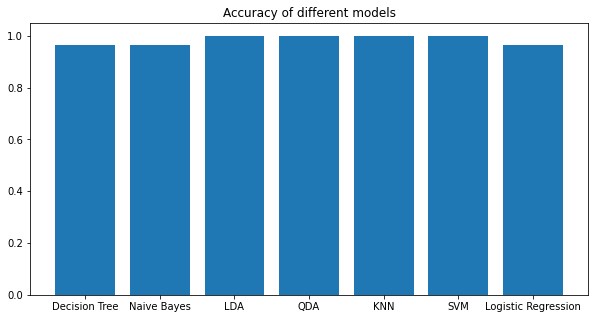

The best model is LDA with an accuracy of 1.00


In [6]:

# Load the iris dataset
iris = load_iris()
df = pd.DataFrame(iris.data, columns=iris.feature_names)
df["target"] = iris.target

X = df[
    [
        "sepal length (cm)",
        "sepal width (cm)",
        "petal length (cm)",
        "petal width (cm)",
    ]
]
y = df["target"]  # target is the species of the flower

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# Create a list of classifiers
models = {
    "Decision Tree": DecisionTreeClassifier(max_depth=3, random_state=1),
    "Naive Bayes": GaussianNB(),
    "LDA": LinearDiscriminantAnalysis(),
    "QDA": QuadraticDiscriminantAnalysis(),
    "KNN": KNeighborsClassifier(),
    "SVM": SVC(kernel="linear"),
    "Logistic Regression": LogisticRegression(),
}

# Train the models
results = {}
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    results[name] = metrics.accuracy_score(y_test, y_pred)

# Plot results
plt.figure(figsize=(10, 5))
plt.bar(results.keys(), results.values())
plt.title("Accuracy of different models")
plt.show()

# Print results
best_model = max(results, key=results.get)
print(f"The best model is {best_model} with an accuracy of {results[best_model]:.2f}")

# save the model to disk
pickle.dump(
    models[best_model], open(SKLEARN_MODEL_PATH, "wb")
)  # export the model to a file so we can use it later


# Train model using Tensorflow

In [7]:
import tensorflow as tf
import os
import matplotlib.pyplot as plt
import tensorflow_datasets as tfds
from pathlib import Path
import numpy as np

In [8]:
train_dataset, metadata = tfds.load("iris", with_info=True, as_supervised=True, split="train", batch_size=32)
num_examples = metadata.splits["train"].num_examples
num_classes = metadata.features["label"].num_classes
labels = metadata.features["label"].names

Dl Completed...: 0 url [00:00, ? url/s]

Dl Size...: 0 MiB [00:00, ? MiB/s]

Generating splits...:   0%|          | 0/1 [00:00<?, ? splits/s]

Generating train examples...:   0%|          | 0/150 [00:00<?, ? examples/s]

Shuffling ~/tensorflow_datasets/iris/2.0.0.incompleteV0L864/iris-train.tfrecord*...:   0%|          | 0/150 [0…

Dataset iris downloaded and prepared to ~/tensorflow_datasets/iris/2.0.0. Subsequent calls will reuse this data.


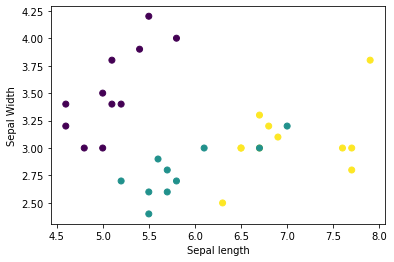

In [9]:
features, labels = next(iter(train_dataset))
sepal_length = features[:,0]
sepal_width = features[:,1]

plt.scatter(sepal_length,
            sepal_width,
            c=labels,
            cmap='viridis')
plt.xlabel("Sepal length")
plt.ylabel("Sepal Width")
plt.show()

In [10]:
model = tf.keras.Sequential([
  tf.keras.layers.Dense(10, activation=tf.nn.relu, input_shape=(4,), name= "input"), 
  tf.keras.layers.Dense(5, activation=tf.nn.relu),
  tf.keras.layers.BatchNormalization(),
  tf.keras.layers.Dense(3, activation=tf.nn.softmax, name="output")
])

Epoch 1/50
5/5 [==============================] - 1s 4ms/step - loss: 1.6001 - accuracy: 0.0933
Epoch 2/50
5/5 [==============================] - 0s 3ms/step - loss: 1.5378 - accuracy: 0.1267
Epoch 3/50
5/5 [==============================] - 0s 3ms/step - loss: 1.4602 - accuracy: 0.1733
Epoch 4/50
5/5 [==============================] - 0s 3ms/step - loss: 1.3640 - accuracy: 0.2600
Epoch 5/50
5/5 [==============================] - 0s 3ms/step - loss: 1.2651 - accuracy: 0.3133
Epoch 6/50
5/5 [==============================] - 0s 3ms/step - loss: 1.1794 - accuracy: 0.4000
Epoch 7/50
5/5 [==============================] - 0s 2ms/step - loss: 1.0925 - accuracy: 0.4600
Epoch 8/50
5/5 [==============================] - 0s 3ms/step - loss: 1.0351 - accuracy: 0.5200
Epoch 9/50
5/5 [==============================] - 0s 3ms/step - loss: 0.9914 - accuracy: 0.5667
Epoch 10/50
5/5 [==============================] - 0s 3ms/step - loss: 0.9528 - accuracy: 0.6267
Epoch 11/50
5/5 [======================

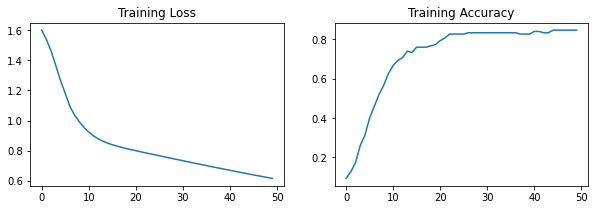

In [11]:
loss_fun = tf.keras.losses.SparseCategoricalCrossentropy()
opt_fun = tf.keras.optimizers.Adam()
model.compile(optimizer=opt_fun, loss=loss_fun, metrics=['accuracy'] )
history = model.fit(train_dataset, batch_size=12, epochs=50)

acc = history.history['accuracy']
loss = history.history['loss']
plt.figure(figsize=(10, 3))
ax = plt.subplot(1, 2, 1)
ax.set_title("Training Loss")
ax.plot(loss)
ax = plt.subplot(1, 2, 2)
ax.set_title("Training Accuracy")
ax.plot(acc)
plt.show()

In [12]:
predictions = model.predict([[0.5, 0.4, 0.8, 0.4]])

1/1 [==============================] - 0s 134ms/step


In [13]:
model.save(TF_MODEL_PATH, save_format="tf")

In [14]:
import shutil
from pathlib import Path
from google.colab import files
import sys

def folder_to_zip(folder_path):
    folder_path = Path(folder_path)
    if not folder_path.exists():
        return
    shutil.make_archive(folder_path.name, 'zip', folder_path)
    return folder_path.with_suffix(".zip")

def zip_and_download_folder_content(model_folder):
    zip_file = folder_to_zip(model_folder)
    files.download(zip_file)



In [15]:
zip_and_download_folder_content(MODELS_DIR)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>